# Setup

In [1]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

!pip install tensorflow
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

2024-06-12 17:10:27.528915: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 17:10:27.528954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 17:10:27.530125: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-12 17:10:27.535872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 17:10:28.219193: W tensorflow/compiler/tf2

# From Biological to Artificial Neurons

## The Perceptron

[Perceptron scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#perceptron)  

Perceptron is a linear unit, with step function for activation. With linear separable data this works well.  
Implemented as:  
```SGDClassifier(loss="perceptron", learning_rate="constant")```

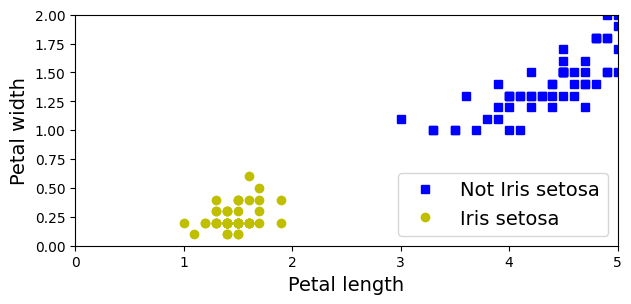

In [2]:
# loads the dataset

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

# plots the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

axes = [0, 5, 0, 2]

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

In [3]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

y_pred

array([ True, False])

### Exercise

- Change below code and try to find the decision boundary
- you can write code to explore this or just do this with try and error

In [4]:
X_new = [[0, 0], [1, 1]]
per_clf.predict(X_new)  # predicts True and False for these 2 flowers


array([ True,  True])

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

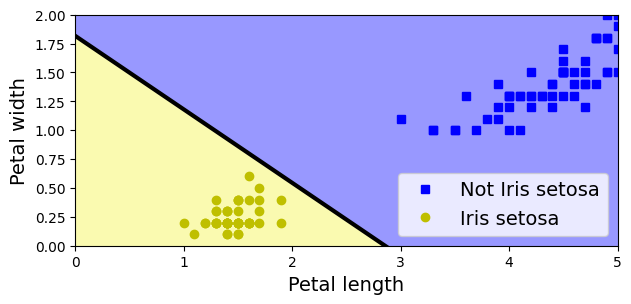

In [5]:
# plots the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

### Opinion

- Do you have an Opinion to the Perceptron Decision Boundary?

## Activation functions

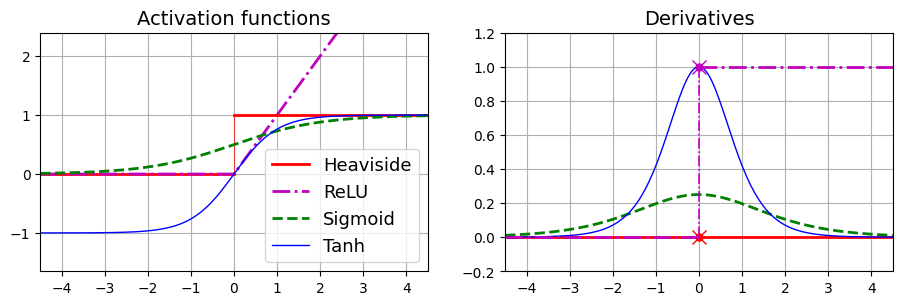

In [6]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

## MLPs

### Regression MLPs
[MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#mlpregressor)

Defaults:  
- 100 hidden neurons with one layer
- relu activation
- max_iter of 200

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42, verbose=1)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

rmse

Iteration 1, loss = 0.88013803
Iteration 2, loss = 0.26109934
Iteration 3, loss = 0.21223984
Iteration 4, loss = 0.19385754
Iteration 5, loss = 0.18691539
Iteration 6, loss = 0.17896554
Iteration 7, loss = 0.17423469
Iteration 8, loss = 0.16927327
Iteration 9, loss = 0.16534287
Iteration 10, loss = 0.16333238
Iteration 11, loss = 0.16073061
Iteration 12, loss = 0.15954068
Iteration 13, loss = 0.15465744
Iteration 14, loss = 0.16184716
Iteration 15, loss = 0.15375564
Iteration 16, loss = 0.15207982
Iteration 17, loss = 0.14791320
Iteration 18, loss = 0.14645258
Iteration 19, loss = 0.14483503
Iteration 20, loss = 0.14468907
Iteration 21, loss = 0.15061565
Iteration 22, loss = 0.14470508
Iteration 23, loss = 0.14280790
Iteration 24, loss = 0.14087808
Iteration 25, loss = 0.14106781
Iteration 26, loss = 0.14097879
Iteration 27, loss = 0.13762971
Iteration 28, loss = 0.13821548
Iteration 29, loss = 0.13961814
Iteration 30, loss = 0.13630654
Iteration 31, loss = 0.14058676
Iteration 32, los

/home/vgoehler/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.5053326657968582

### Classification MLPs

[MLPClassifier in Docs](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#mlpclassifier)


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42, verbose=1)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

Iteration 1, loss = 1.10433562
Iteration 2, loss = 1.09829948
Iteration 3, loss = 1.09229404
Iteration 4, loss = 1.08632020
Iteration 5, loss = 1.08037887
Iteration 6, loss = 1.07447094
Iteration 7, loss = 1.06859730
Iteration 8, loss = 1.06275876
Iteration 9, loss = 1.05695607
Iteration 10, loss = 1.05118468
Iteration 11, loss = 1.04542957
Iteration 12, loss = 1.03971186
Iteration 13, loss = 1.03403259
Iteration 14, loss = 1.02839269
Iteration 15, loss = 1.02279306
Iteration 16, loss = 1.01723450
Iteration 17, loss = 1.01171778
Iteration 18, loss = 1.00624825
Iteration 19, loss = 1.00080262
Iteration 20, loss = 0.99539765
Iteration 21, loss = 0.99003612
Iteration 22, loss = 0.98471920
Iteration 23, loss = 0.97944721
Iteration 24, loss = 0.97421384
Iteration 25, loss = 0.96899563
Iteration 26, loss = 0.96382200
Iteration 27, loss = 0.95869372
Iteration 28, loss = 0.95359338
Iteration 29, loss = 0.94852677
Iteration 30, loss = 0.94350552
Iteration 31, loss = 0.93853031
Iteration 32, los

1.0

### Task

Train a MLP Classifier on the following classification data:

- find a sensible parameter distribution

    - `max_iter`
    - `hidden_layer_sizes`
    - `learning_rate_init`

- see that the training loss / validation score and the validation score for the test data is good

In [9]:
from sklearn.datasets import make_classification

# data
ex = make_classification(n_samples=1_000, n_features=50, n_classes=2)

ex_data_train, ex_data_test, ex_label_train, ex_label_test = train_test_split(
    *ex, random_state=42)

# MLP
mlp_clf_ex = MLPClassifier(verbose=1, validation_fraction=0.2, early_stopping=True)

pipeline = make_pipeline(StandardScaler(), mlp_clf_ex)
pipeline.fit(ex_data_train, ex_label_train)

print("Best Training Loss: %.4f"%mlp_clf_ex.best_validation_score_)

# validation
print("Validation Score on Test Data: %.4f"%pipeline.score(ex_data_test, ex_label_test))



Iteration 1, loss = 0.71636823
Validation score: 0.633333
Iteration 2, loss = 0.67416907
Validation score: 0.673333
Iteration 3, loss = 0.63810605
Validation score: 0.706667
Iteration 4, loss = 0.60565649
Validation score: 0.706667
Iteration 5, loss = 0.57584216
Validation score: 0.713333
Iteration 6, loss = 0.54877456
Validation score: 0.740000
Iteration 7, loss = 0.52414149
Validation score: 0.753333
Iteration 8, loss = 0.50099363
Validation score: 0.773333
Iteration 9, loss = 0.48023542
Validation score: 0.793333
Iteration 10, loss = 0.46077723
Validation score: 0.813333
Iteration 11, loss = 0.44268865
Validation score: 0.820000
Iteration 12, loss = 0.42539543
Validation score: 0.820000
Iteration 13, loss = 0.40953398
Validation score: 0.826667
Iteration 14, loss = 0.39478103
Validation score: 0.826667
Iteration 15, loss = 0.38045149
Validation score: 0.833333
Iteration 16, loss = 0.36693310
Validation score: 0.840000
Iteration 17, loss = 0.35385977
Validation score: 0.840000
Iterat

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [10]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [11]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [12]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [13]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

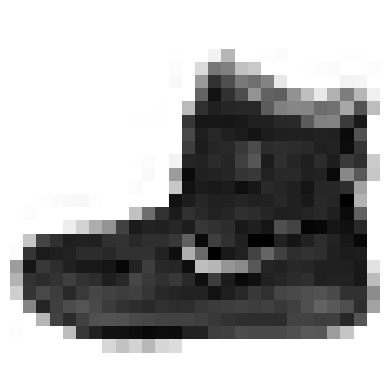

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [15]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot:

In [17]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

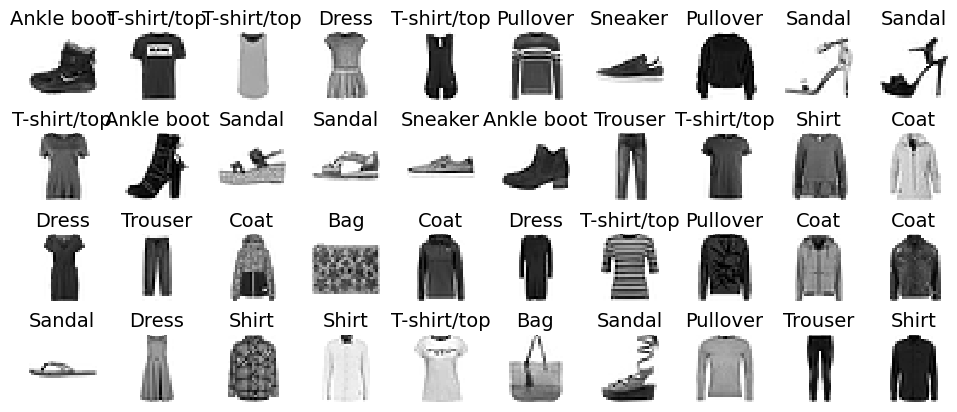

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Creating the model using the Sequential API

In [19]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2024-06-12 17:10:37.570201: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-06-12 17:10:37.570228: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: tuxedo-laptop
2024-06-12 17:10:37.570236: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: tuxedo-laptop
2024-06-12 17:10:37.570345: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 550.67.0
2024-06-12 17:10:37.570366: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 550.54.15
2024-06-12 17:10:37.570372: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 550.54.15 does not match DSO version 550.67.0 -- cannot find working devices in this configuration


In [20]:
# clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### Question?

- What did we do here?

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


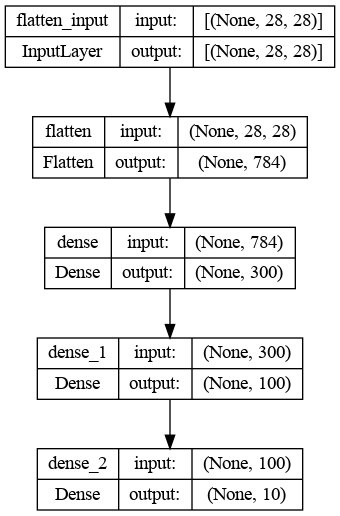

In [22]:
# another way to display the model's architecture
# we need pydot
! pip install pydot
# and we need graphviz installed (look into the decision tree chapter)
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

![](my_fashion_mnist_model.png)

In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
model.get_layer('dense') is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00185515,  0.02926985,  0.05868065, ..., -0.0088063 ,
         0.0713679 ,  0.00937348],
       [-0.03892955, -0.02936913, -0.06527564, ..., -0.03098721,
        -0.0417081 , -0.06601815],
       [ 0.01505365,  0.05901888, -0.03067641, ...,  0.04821589,
        -0.0603771 ,  0.04059841],
       ...,
       [ 0.07078631, -0.0224257 , -0.05102938, ..., -0.05861277,
        -0.02067256,  0.01196858],
       [ 0.00615583,  0.04649929, -0.05656538, ...,  0.06965433,
        -0.04562974,  0.0362285 ],
       [-0.06229173,  0.00446733,  0.04560686, ...,  0.00317926,
        -0.07271869, -0.02465285]], dtype=float32)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Question?

- how many weights do we have?
- why do we have as many weights as we have?


In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

### Compiling the model

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

In [32]:
# this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

### Training

#### One Hot

In [33]:
#  shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Note: it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample.

In [34]:
# shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

### Training and evaluating the model

In [35]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7195 - sparse_categorical_accuracy: 0.7648 - val_loss: 0.5002 - val_sparse_categorical_accuracy: 0.8310
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4851 - sparse_categorical_accuracy: 0.8308 - val_loss: 0.4661 - val_sparse_categorical_accuracy: 0.8316
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4381 - sparse_categorical_accuracy: 0.8454 - val_loss: 0.4216 - val_sparse_categorical_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4118 - sparse_categorical_accuracy: 0.8560 - val_loss: 0.3919 - val_sparse_categorical_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3906 - sparse_categorical_accuracy: 0.8626 - val_loss: 0.3896 - val_sparse_categorical_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3737 - spars

In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
len(X_train)

55000

### Question

- What does the Stuff in the Output mean?
  

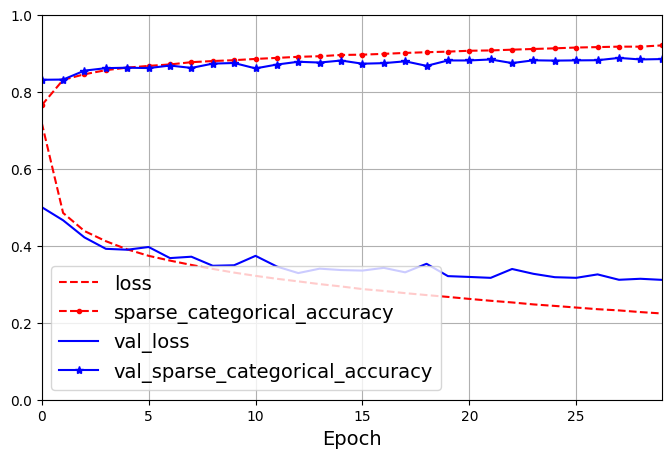

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")

plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 764us/step - loss: 0.3274 - sparse_categorical_accuracy: 0.8822


[0.32742518186569214, 0.8822000026702881]

### Using the model to make predictions

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

y_proba.round(2)

1/1 [==============================] - 0s 13ms/step
Classnames:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

### Question

- What do we see here?

In [44]:
print("Classnames: ", class_names)

Classnames:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [45]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

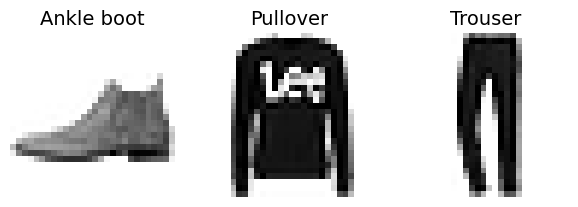

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [49]:
# load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

### Example

- Try to finish the example below
- you need to enter the dense layers in the model!

In [50]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    # enter Dense Layers here! try with three, with 50 nodes and relu
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 6.1043 - root_mean_squared_error: 2.4707 - val_loss: 40.0266 - val_root_mean_squared_error: 6.3267
Epoch 2/10
363/363 [==============================] - 0s 811us/step - loss: 4.0549 - root_mean_squared_error: 2.0137 - val_loss: 36.0320 - val_root_mean_squared_error: 6.0027
Epoch 3/10
363/363 [==============================] - 0s 828us/step - loss: 2.8829 - root_mean_squared_error: 1.6979 - val_loss: 32.4279 - val_root_mean_squared_error: 5.6946
Epoch 4/10
363/363 [==============================] - 0s 834us/step - loss: 2.1427 - root_mean_squared_error: 1.4638 - val_loss: 29.0916 - val_root_mean_squared_error: 5.3937
Epoch 5/10
363/363 [==============================] - 0s 844us/step - loss: 1.6466 - root_mean_squared_error: 1.2832 - val_loss: 26.0395 - val_root_mean_squared_error: 5.1029
Epoch 6/10
363/363 [==============================] - 0s 826us/step - loss: 1.3146 - root_mean_squared_error: 1.1466 - val_loss

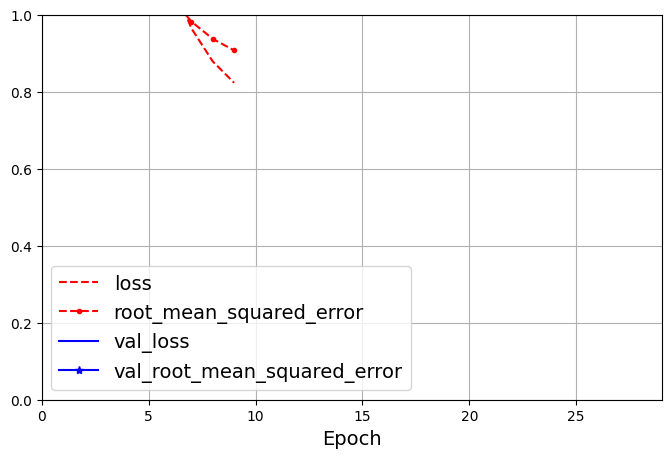

In [51]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")

plt.show()

In [52]:
rmse_test

0.8382837176322937

In [53]:
y_pred

array([[0.9930159],
       [1.5368159],
       [2.035911 ]], dtype=float32)

# Building Complex Models Using the Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [54]:
#reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

## Wide and Deep

In [55]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

### Question
- What do we see here?

In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3059 - root_mean_squared_error: 1.1427 - val_loss: 1.9297 - val_root_mean_squared_error: 1.3891
Epoch 2/20
363/363 [==============================] - 0s 969us/step - loss: 0.4945 - root_mean_squared_error: 0.7032 - val_loss: 0.5621 - val_root_mean_squared_error: 0.7498
Epoch 3/20
363/363 [==============================] - 0s 973us/step - loss: 0.4162 - root_mean_squared_error: 0.6452 - val_loss: 0.4616 - val_root_mean_squared_error: 0.6794
Epoch 4/20
363/363 [==============================] - 0s 962us/step - loss: 0.3769 - root_mean_squared_error: 0.6139 - val_loss: 0.3504 - val_root_mean_squared_error: 0.5920
Epoch 5/20
363/363 [==============================] - 0s 930us/step - loss: 0.3626 - root_mean_squared_error: 0.6021 - val_loss: 0.6262 - val_root_mean_squared_error: 0.7913
Epoch 6/20
363/363 [==============================] - 0s 948us/step - loss: 0.3542 - root_mean_squared_error: 0.5952 - val_loss: 1.2

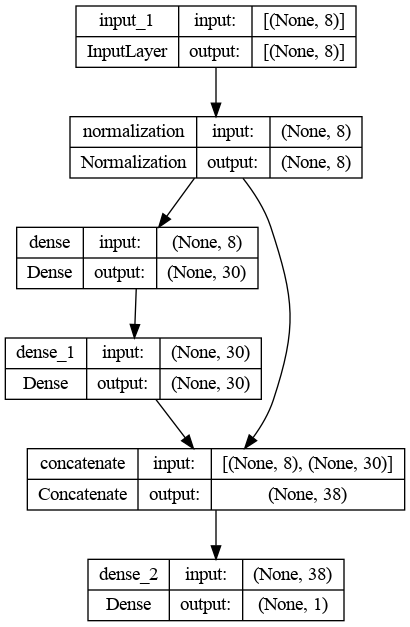

In [58]:
tf.keras.utils.plot_model(model, "wideanddeep.png", show_shapes=True)

![](wideanddeep.png)

## Multiple Input

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [60]:
tf.random.set_seed(42)

In [61]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [62]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2860 - root_mean_squared_error: 1.1340 - val_loss: 0.8768 - val_root_mean_squared_error: 0.9364
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4761 - root_mean_squared_error: 0.6900 - val_loss: 0.9428 - val_root_mean_squared_error: 0.9710
Epoch 3/20
363/363 [==============================] - 0s 987us/step - loss: 0.4242 - root_mean_squared_error: 0.6513 - val_loss: 0.3819 - val_root_mean_squared_error: 0.6180
Epoch 4/20
363/363 [==============================] - 0s 990us/step - loss: 0.3979 - root_mean_squared_error: 0.6308 - val_loss: 0.4149 - val_root_mean_squared_error: 0.6441
Epoch 5/20
363/363 [==============================] - 0s 994us/step - loss: 0.3822 - root_mean_squared_error: 0.6183 - val_loss: 0.3503 - val_root_mean_squared_error: 0.5918
Epoch 6/20
363/363 [==============================] - 0s 994us/step - loss: 0.3715 - root_mean_squared_error: 0.6095 - val_loss: 0.423

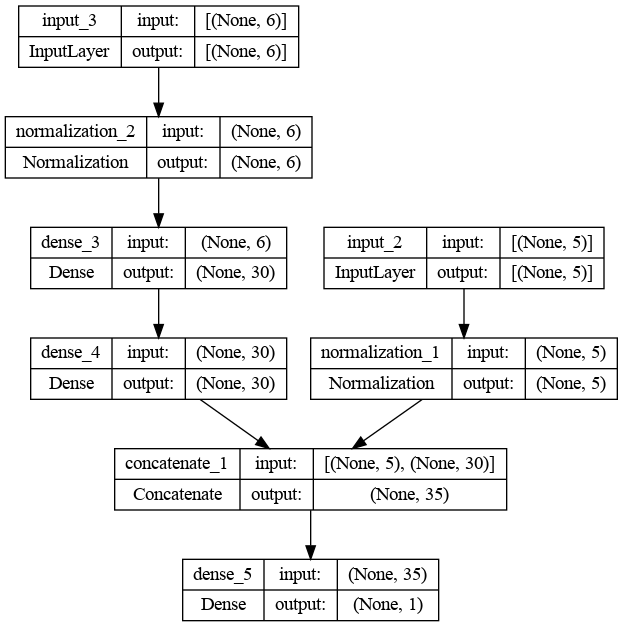

In [65]:
tf.keras.utils.plot_model(model, "multiinput.png", show_shapes=True)

![](multiinput.png)

## Multiple Outputs

- does this make sense?


In [67]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [68]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [70]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9943 - dense_2_loss: 1.9464 - dense_3_loss: 2.4256 - dense_2_root_mean_squared_error: 1.3951 - dense_3_root_mean_squared_error: 1.5574 - val_loss: 2.4974 - val_dense_2_loss: 0.8891 - val_dense_3_loss: 16.9718 - val_dense_2_root_mean_squared_error: 0.9429 - val_dense_3_root_mean_squared_error: 4.1197
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6663 - dense_2_loss: 0.6422 - dense_3_loss: 0.8834 - dense_2_root_mean_squared_error: 0.8014 - dense_3_root_mean_squared_error: 0.9399 - val_loss: 1.7773 - val_dense_2_loss: 1.0728 - val_dense_3_loss: 8.1174 - val_dense_2_root_mean_squared_error: 1.0358 - val_dense_3_root_mean_squared_error: 2.8491
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5295 - dense_2_loss: 0.5193 - dense_3_loss: 0.6219 - dense_2_root_mean_squared_error: 0.7206 - dense_3_root_mean_squared_error: 0.7886 - val_loss: 0.8651 - val_dense_2_los

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 6)                    13        ['input_2[0][0]']             
 tion)                                                                                            
                                                                                                  
 input_1 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   210       ['normalization_1[0][0]'] 

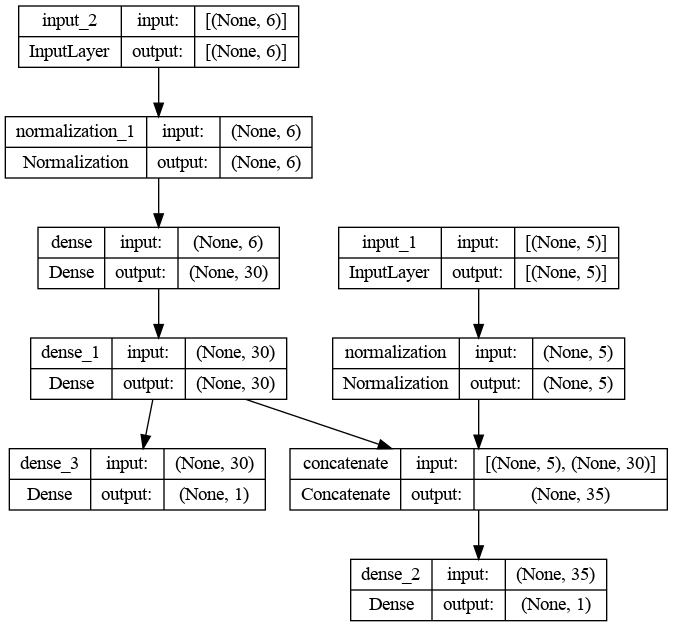

In [72]:
tf.keras.utils.plot_model(model, "multioutput.png", show_shapes=True)

![](multioutput.png)

In [73]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 720us/step - loss: 0.3268 - dense_2_loss: 0.3203 - dense_3_loss: 0.3859 - dense_2_root_mean_squared_error: 0.5659 - dense_3_root_mean_squared_error: 0.6212


In [74]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 128ms/step


In [75]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 15ms/step



# Bits and Pieces

## Saving and Restoring a Model


In [79]:
# delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [80]:
from pathlib import Path
# show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [81]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 40ms/step


In [85]:
model.save_weights("my_weights")

In [86]:
model.load_weights("my_weights")

In [87]:
#  show the list of my_weights.* files
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


## Using Callbacks
### train

- training
- epoch
- batch

### validation

- test
- batch

### prediction

- test
- batch

_save_best_only_

In [88]:
shutil.rmtree("my_checkpoints", ignore_errors=True) 

In [89]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3326 - dense_2_loss: 0.3269 - dense_3_loss: 0.3845 - dense_2_root_mean_squared_error: 0.5717 - dense_3_root_mean_squared_error: 0.6201 - val_loss: 0.3430 - val_dense_2_loss: 0.3315 - val_dense_3_loss: 0.4461 - val_dense_2_root_mean_squared_error: 0.5758 - val_dense_3_root_mean_squared_error: 0.6679
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3273 - dense_2_loss: 0.3215 - dense_3_loss: 0.3791 - dense_2_root_mean_squared_error: 0.5670 - dense_3_root_mean_squared_error: 0.6157 - val_loss: 0.4401 - val_dense_2_loss: 0.4342 - val_dense_3_loss: 0.4936 - val_dense_2_root_mean_squared_error: 0.6589 - val_dense_3_root_mean_squared_error: 0.7026
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3242 - dense_2_loss: 0.3184 - dense_3_loss: 0.3763 - dense_2_root_mean_squared_error: 0.5642 - dense_3_root_mean_squared_error: 0.6134 - val_loss: 0.3382 - val_dense_2_loss

In [90]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3152 - dense_2_loss: 0.3094 - dense_3_loss: 0.3672 - dense_2_root_mean_squared_error: 0.5563 - dense_3_root_mean_squared_error: 0.6060 - val_loss: 0.3116 - val_dense_2_loss: 0.3051 - val_dense_3_loss: 0.3701 - val_dense_2_root_mean_squared_error: 0.5524 - val_dense_3_root_mean_squared_error: 0.6083
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3172 - dense_2_loss: 0.3117 - dense_3_loss: 0.3675 - dense_2_root_mean_squared_error: 0.5583 - dense_3_root_mean_squared_error: 0.6062 - val_loss: 0.7908 - val_dense_2_loss: 0.7888 - val_dense_3_loss: 0.8090 - val_dense_2_root_mean_squared_error: 0.8881 - val_dense_3_root_mean_squared_error: 0.8994
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3196 - dense_2_loss: 0.3145 - dense_3_loss: 0.3650 - dense_2_root_mean_squared_error: 0.5608 - dense_3_root_mean_squared_error: 0.6041 - val_loss: 0.3877 - val_dense_2_l

In [91]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [92]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.67
Epoch=1, val/train=1.62
Epoch=2, val/train=1.00
Epoch=3, val/train=1.03
Epoch=4, val/train=1.10
Epoch=5, val/train=1.02
Epoch=6, val/train=1.03
Epoch=7, val/train=2.25
Epoch=8, val/train=1.54
Epoch=9, val/train=5.41


## Using TensorBoard for Visualization

TensorBoard is preinstalled on Colab, but not the `tensorboard-plugin-profile`, so let's install it:

In [93]:
%pip install -q -U tensorboard-plugin-profile

Note: you may need to restart the kernel to use updated packages.


In [94]:
shutil.rmtree("my_logs", ignore_errors=True)

In [95]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [96]:
# builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [97]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20


2024-06-12 18:08:42.435300: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-12 18:08:42.435331: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-06-12 18:08:42.437574: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


274/363 [=====================>........] - ETA: 0s - loss: 2.2713 - root_mean_squared_error: 1.5071

2024-06-12 18:08:42.787835: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-12 18:08:42.787867: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-06-12 18:08:42.881490: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-06-12 18:08:42.890418: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-06-12 18:08:42.892755: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: my_logs/run_2024_06_12_18_08_36/plugins/profile/2024_06_12_18_08_42/tuxedo-laptop.xplane.pb


363/363 [==============================] - 1s 1ms/step - loss: 1.9300 - root_mean_squared_error: 1.3892 - val_loss: 2.1967 - val_root_mean_squared_error: 1.4821
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7716 - root_mean_squared_error: 0.8784 - val_loss: 0.7866 - val_root_mean_squared_error: 0.8869
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6561 - root_mean_squared_error: 0.8100 - val_loss: 0.6235 - val_root_mean_squared_error: 0.7896
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5931 - root_mean_squared_error: 0.7701 - val_loss: 0.5558 - val_root_mean_squared_error: 0.7455
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5485 - root_mean_squared_error: 0.7406 - val_loss: 0.5114 - val_root_mean_squared_error: 0.7151
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5125 - root_mean_squared_error: 0.7159 - val_loss: 0.4875 - val_root_mean_s

In [98]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2024_06_12_18_08_36
    plugins
      profile
        2024_06_12_18_08_42
          tuxedo-laptop.xplane.pb
    train
      events.out.tfevents.1718208522.tuxedo-laptop.2059237.0.v2
    validation
      events.out.tfevents.1718208523.tuxedo-laptop.2059237.1.v2


Let's load the `tensorboard` Jupyter extension and start the TensorBoard server: 

In [99]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

**Note**: if you prefer to access TensorBoard in a separate tab, click the "localhost:6006" link below:

In [100]:
from IPython.display import display, HTML

display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

You can use also visualize histograms, images, text, and even listen to audio using TensorBoard:

In [101]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

You can share your TensorBoard logs with the world by uploading them to https://tensorboard.dev/. For this, you can run the `tensorboard dev upload` command, with the `--logdir` and `--one_shot` options, and optionally the `--name` and `--description` options. The first time, it will ask you to accept Google's Terms of Service, and to authenticate.

Notes:
* Authenticating requires user input. Colab supports user input from shell commands, but the main other Jupyter environments do not, so for them we use a hackish workaround (alternatively, you could run the command in a terminal window, after you make sure to activate this project's conda environment and move to this notebook's directory).
* If you get an authentication related error (such as *invalid_grant: Bad Request*), it's likely that your login session has expired. In this case, try running the command `tensorboard dev auth revoke` to logout, and try again.

When you stop this Jupyter kernel (a.k.a. Runtime), it will automatically stop the TensorBoard server as well. Another way to stop the TensorBoard server is to kill it, if you are running on Linux or MacOSX. First, you need to find its process ID:

In [102]:
from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:00:40 ago; pid 2338191)


Next you can use the following command on Linux or MacOSX, replacing `<pid>` with the pid listed above:

    !kill <pid>

On Windows:

    !taskkill /F /PID <pid>

# Fine-Tuning Neural Network Hyperparameters

In this section we'll use the Fashion MNIST dataset again:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

tf.keras.backend.clear_session()
tf.random.set_seed(42)

## Model Hyperparameters

In [105]:
%pip install -q -U keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [106]:
import keras_tuner as kt

def build_model(hp : kt.HyperParameters):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [107]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 21s]
val_accuracy: 0.8456000089645386

Best val_accuracy So Far: 0.8651999831199646
Total elapsed time: 00h 01m 48s


In [108]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [109]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [110]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8651999831199646


In [111]:
best_trial.metrics.get_last_value("val_accuracy")

0.8651999831199646

In [112]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3266 - accuracy: 0.8794
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3166 - accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3068 - accuracy: 0.8872
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2987 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2923 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2838 - accuracy: 0.8942
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.8961
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2721 - accuracy: 0.8990
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2657 - accuracy: 0.9003
Epoch 10/10
313/313 [==============================] - 0s 803us/step - loss: 0.410


## Preprocessing Hyperparameters  

- subclass _kt.HyperModel_
- use build and fit method

In [113]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

Hyperband trains many different models for few epochs and keeps only the 1/factor best ones.
The best model gets trained for max_epochs.

In [116]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [115]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 28s]
val_accuracy: 0.8435999751091003

Best val_accuracy So Far: 0.8787999749183655
Total elapsed time: 00h 12m 09s


## Exploring Search Space

In [ ]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 4 Complete [00h 00m 21s]
val_accuracy: 0.8492000102996826

Best val_accuracy So Far: 0.8492000102996826
Total elapsed time: 00h 01m 25s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
4                 |8                 |n_hidden
239               |26                |n_neurons
0.00077674        |0.0014505         |learning_rate
sgd               |sgd               |optimizer
False             |False             |normalize

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.1979 - accuracy: 0.7555 - val_loss: 0.5578 - val_accuracy: 0.8066
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4931 - accuracy: 0.8237 - val_loss: 0.4831 - val_accuracy: 0.8280
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4260 - accuracy: 0.8444 - val_loss: 0.4634 - val_accuracy: 0.8350
Epoch 4/10
 843/1719 [=============>................] - ETA: 2s - loss: 0.3874 - accuracy: 0.8598

In [ ]:
%tensorboard --logdir {root_logdir}

# Exercise


*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `tf.keras.datasets.mnist.load_data()`. See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*